# eCommerce Order Analysis

The appropriate recommendations are dependent on the established KPIs. However, this process will be explored in further iterations of this project, in different notebooks.

This notebook focuses on gathering high-level understanding of the orders including but not limited to answering:
* What were the most ordered items?
* Who were the most loyal customers?
* What was the average spend per customer?
* Is there a seasonality to orders?
* What are the most profilic traffic sources that lead to conversion?

Order Exploration
We'll start this exploration by investigating products that are most ordered, order frequency and information about the ordering process. Some questions we aim to answer here are:

What was the highest selling product?
How often was this product ordered?
How much revenue did the top products bring in?
Is there a seasonality or trend associated with this product?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
orders = pd.read_csv('/content/drive/MyDrive/2024BusinessAnalysisProject/Data/UsersOrders.csv')

In [3]:
orders.head()

,Unnamed: 0,id,first_name,last_name,email,age,gender,state,street_address,postal_code,...,traffic_source,created_at,user_geom,order_id,user_id,status,gender_1,created_at_1,shipped_at,num_of_item
0,0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,...,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,M,2023-11-28 10:05:00+00:00,2023-11-30 00:51:00+00:00,1
1,1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,...,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,F,2024-02-24 04:10:00+00:00,NaN,1
2,2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,...,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,F,2024-08-17 17:54:00+00:00,2024-08-18 16:56:00+00:00,1
3,3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,...,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,M,2021-10-04 14:59:00+00:00,2021-10-06 02:34:00+00:00,1
4,4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,...,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,M,2024-01-02 00:46:00+00:00,2024-01-03 20:08:00+00:00,1


In [4]:
orders.columns

Index(['Unnamed: 0', 'id', 'first_name', 'last_name', 'email', 'age', 'gender',
       'state', 'street_address', 'postal_code', 'city', 'country', 'latitude',
       'longitude', 'traffic_source', 'created_at', 'user_geom', 'order_id',
       'user_id', 'status', 'gender_1', 'created_at_1', 'shipped_at',
       'num_of_item'],
      dtype='object')

In [5]:
orders.drop('Unnamed: 0', axis=1, inplace=True)

In [6]:
orders.head()

,id,first_name,last_name,email,age,gender,state,street_address,postal_code,city,...,traffic_source,created_at,user_geom,order_id,user_id,status,gender_1,created_at_1,shipped_at,num_of_item
0,43158,John,Christensen,johnchristensen@example.com,17,M,Acre,5948 Goodman Union Suite 281,69980-000,NaN,...,Display,2019-10-28 10:05:00+00:00,POINT(-72.87094866 -8.065346116),53699,43158,Complete,M,2023-11-28 10:05:00+00:00,2023-11-30 00:51:00+00:00,1
1,20002,Lisa,Benton,lisabenton@example.org,60,F,Acre,892 Herman Drive Suite 544,69980-000,NaN,...,Search,2021-03-12 04:10:00+00:00,POINT(-72.87094866 -8.065346116),24826,20002,Processing,F,2024-02-24 04:10:00+00:00,NaN,1
2,79621,Alexandria,Rodriguez,alexandriarodriguez@example.com,23,F,Acre,92083 Bradford Pass Apt. 622,69980-000,NaN,...,Search,2023-10-06 17:54:00+00:00,POINT(-72.87094866 -8.065346116),99312,79621,Returned,F,2024-08-17 17:54:00+00:00,2024-08-18 16:56:00+00:00,1
3,67295,Edward,Riggs,edwardriggs@example.org,57,M,Acre,7705 Meyer Causeway,69980-000,NaN,...,Search,2019-04-24 14:59:00+00:00,POINT(-72.87094866 -8.065346116),83915,67295,Complete,M,2021-10-04 14:59:00+00:00,2021-10-06 02:34:00+00:00,1
4,27421,Steven,Bolton,stevenbolton@example.com,43,M,Acre,7982 David Oval Apt. 145,69980-000,NaN,...,Search,2021-11-30 00:46:00+00:00,POINT(-72.87094866 -8.065346116),34018,27421,Complete,M,2024-01-02 00:46:00+00:00,2024-01-03 20:08:00+00:00,1


In [7]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 124747 entries, 0 to 124746
Data columns (total 23 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              124747 non-null  int64  
 1   first_name      124747 non-null  object 
 2   last_name       124747 non-null  object 
 3   email           124747 non-null  object 
 4   age             124747 non-null  int64  
 5   gender          124747 non-null  object 
 6   state           124747 non-null  object 
 7   street_address  124747 non-null  object 
 8   postal_code     124747 non-null  object 
 9   city            123552 non-null  object 
 10  country         124747 non-null  object 
 11  latitude        124747 non-null  float64
 12  longitude       124747 non-null  float64
 13  traffic_source  124747 non-null  object 
 14  created_at      124747 non-null  object 
 15  user_geom       124747 non-null  object 
 16  order_id        124747 non-null  int64  
 17  user_id   

#### Data Cleaning:

In [8]:
orders.isna().sum()

,0
id,0
first_name,0
last_name,0
email,0
age,0
gender,0
state,0
street_address,0
postal_code,0
city,1195


In [9]:
orders.duplicated().sum()

0

All of the orders in the data are unique.

In [10]:
orders['order_id'].duplicated().sum()

0

There are duplicate users.

In [11]:
orders['user_id'].duplicated().sum()

45034

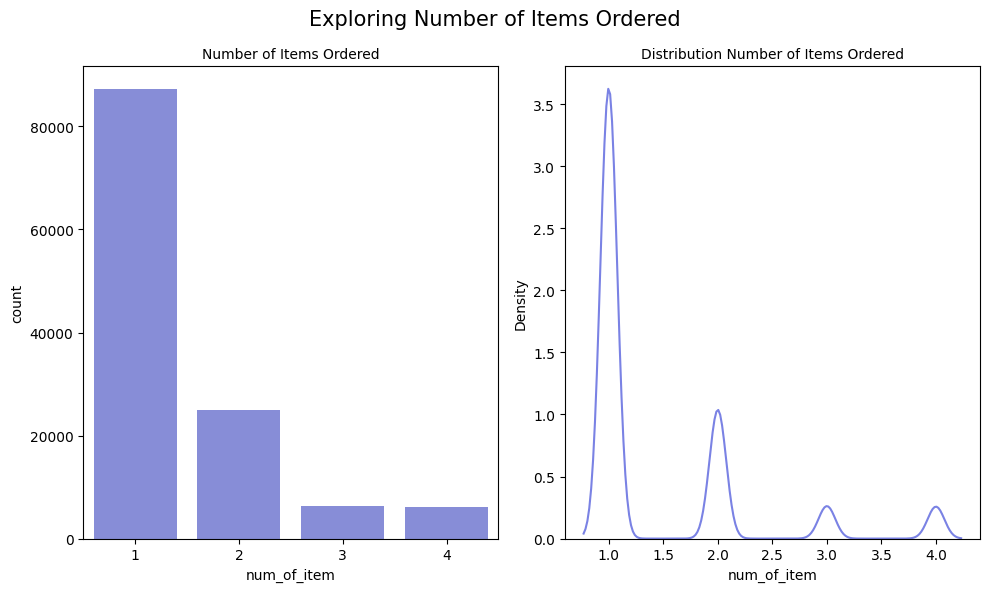

In [12]:
# creatig subplots for number of items
fig, axes = plt.subplots(1, 2, figsize=(10, 6))
fig.suptitle('Exploring Number of Items Ordered', fontsize=15)
# ax = plt.gca()

sns.countplot(ax=axes[0], x='num_of_item', data=orders, color='#7A82E4')
axes[0].set_title('Number of Items Ordered', fontsize=10)

sns.kdeplot(ax=axes[1], data=orders, x='num_of_item', color='#7A82E4')
axes[1].set_title('Distribution Number of Items Ordered', fontsize=10)


plt.tight_layout()
plt.show();

Most orders items ordered are for a single item. This information can help us explore ways to incorporate incentives for the shopper to pair items with other recommended products.

In [13]:
orders['gender'].value_counts()

,count
gender,
M,62432
F,62315


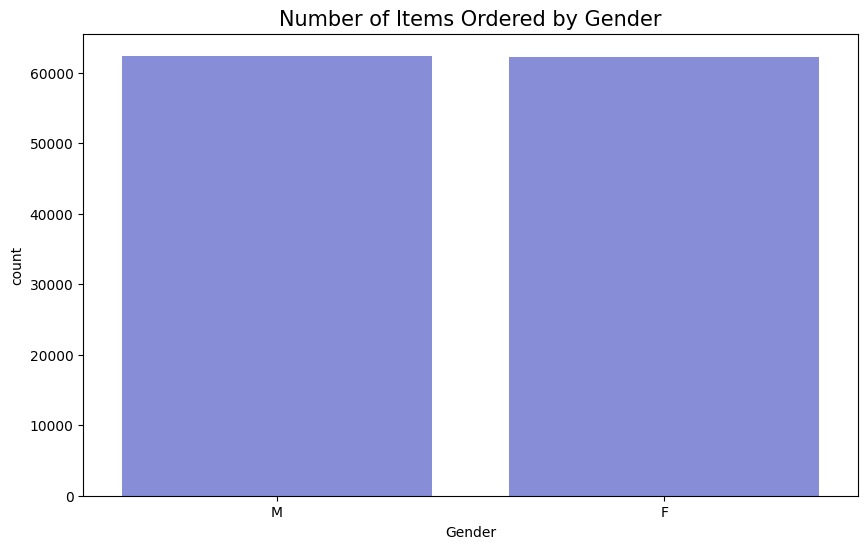

In [14]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(orders['gender'].value_counts(), color='#7A82E4')
plt.xlabel('Gender')
plt.title('Number of Items Ordered by Gender', fontsize=15);

The only gender represented in our orders are Female customers.

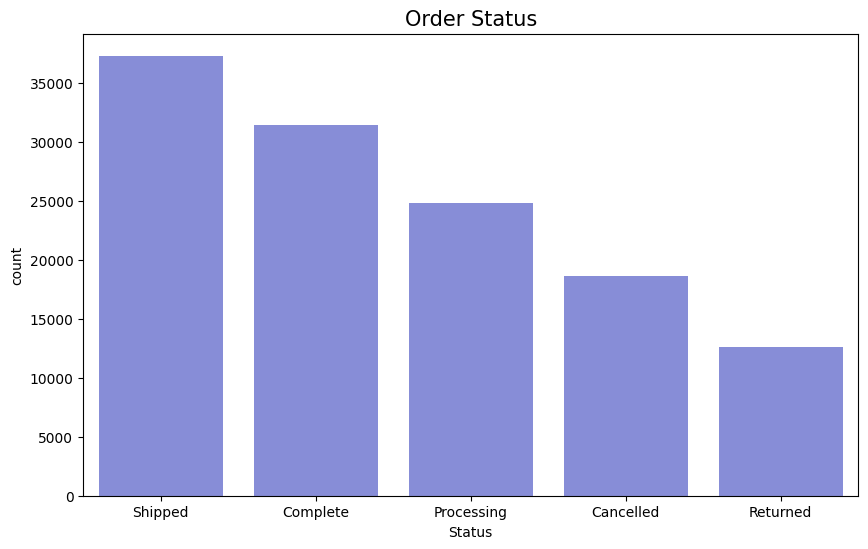

In [15]:
fig = plt.figure(figsize=(10, 6))
sns.barplot(orders['status'].value_counts(), color='#7A82E4')
plt.xlabel('Status')
plt.title('Order Status', fontsize=15);

Most of the orders in this data were cancelled. This finding would indicate that this is perhaps not the best data for the purposes of our research.